In [1]:
import numpy as np
import scipy as sp
import pymc3 as pm
import tensorflow_probability as tfp
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
shape = 2
scale = 2
rate = 1 / scale
n_sample = 10000

In [5]:
xx = np.linspace(0, 20)
# ground truth
gamma_pdf = sp.stats.gamma(a=shape, scale=scale).pdf

s_np = np.random.gamma(shape=shape, scale=scale, size=n_sample)
s_sp = sp.stats.gamma(a=shape, scale=scale).rvs(size=n_sample)
s_tfp = tfp.distributions.Gamma(concentration=shape, rate=rate).sample(n_sample).numpy()
s_pm = pm.Gamma.dist(alpha=shape, beta=rate).random(size=n_sample)

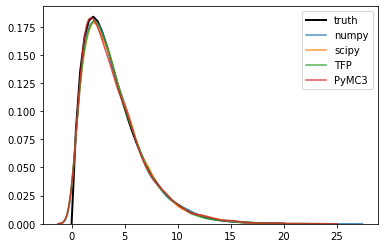

In [14]:
fig, ax = plt.subplots()

ax.plot(xx, gamma_pdf(xx), label='truth', lw=2, c='k')
sns.kdeplot(s_np, ax=ax, label='numpy', alpha=0.8)
sns.kdeplot(s_sp, ax=ax, label='scipy', alpha=0.8)
sns.kdeplot(s_tfp, ax=ax, label='TFP', alpha=0.8)
sns.kdeplot(s_pm, ax=ax, label='PyMC3', alpha=0.8)

plt.savefig('gamma_pdf.png')

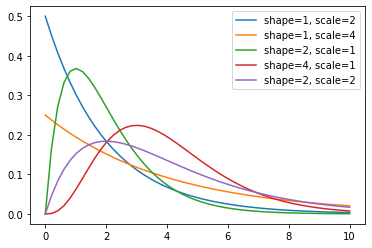

In [38]:
xx = np.linspace(0, 10)

def plot_gamma(xx, shape, scale):
    plt.plot(xx, sp.stats.gamma(a=shape, scale=scale).pdf(xx), label=f'shape={shape}, scale={scale}')
    
   
# plot_gamma(xx, 1, 1)
plot_gamma(xx, 1, 2)
plot_gamma(xx, 1, 4)
# plot_gamma(xx, 1, 8)
plot_gamma(xx, 2, 1)
plot_gamma(xx, 4, 1)
plot_gamma(xx, 2, 2)
plt.legend()
plt.savefig('gamma_dists.png')

In [47]:
stan_code = '''

data {
  int N;
  vector[N] Y;
}

parameters {
  real<lower=0> shape;
  real<lower=0> rate;
}

model {
  Y ~ gamma(shape, rate);
}

'''

In [48]:
data = dict(N=n_sample, Y=s_np)
stan_model = pystan.StanModel(model_code=stan_code)
fit = stan_model.sampling(data=data)

In [51]:
print(fit)

Inference for Stan model: anon_model_6a5d60bed963727c801dc434b96a49a1.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
shape   1.98  8.3e-4   0.03   1.93   1.97   1.98    2.0   2.04   1016    1.0
rate    0.49  2.3e-4 7.4e-3   0.47   0.48   0.49   0.49    0.5   1020    1.0
lp__  -2.3e4    0.03   1.01 -2.3e4 -2.3e4 -2.3e4 -2.3e4 -2.3e4   1192    1.0

Samples were drawn using NUTS at Thu Dec 12 13:31:44 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


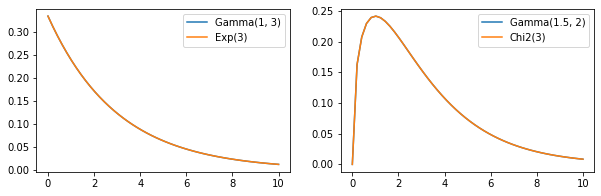

In [67]:
from scipy import stats

xx = np.linspace(0, 10)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

shape, scale = 1, 3
ax[0].plot(xx, stats.gamma(a=shape, scale=scale).pdf(xx), label=f'Gamma({shape}, {scale})')
ax[0].plot(xx, stats.expon(scale=scale).pdf(xx), label=f'Exp({scale})')
ax[0].legend()

shape, scale = 3/2, 2 
ax[1].plot(xx, stats.gamma(a=shape, scale=scale).pdf(xx), label=f'Gamma({shape}, {scale})')
ax[1].plot(xx, stats.chi2(df=2*shape).pdf(xx), label=f'Chi2({int(2*shape)})')
ax[1].legend()

plt.savefig('gamma_exp_chi2.png')

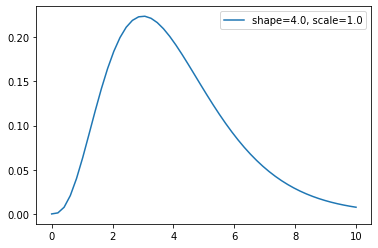

In [91]:
def calc_gamma_param(mu, sigma):
    return (mu / sigma)**2, sigma**2 / mu

mu, sigma = 4, 2
shape, scale = calc_gamma_param(mu, sigma)

def plot_gamma(xx, shape, scale):
    plt.plot(xx, sp.stats.gamma(a=shape, scale=scale).pdf(xx), label=f'shape={shape}, scale={scale}')
    
xx = np.linspace(0, 10)
plot_gamma(xx, shape, scale)
plt.legend()

plt.savefig('gamma_mu_sigma.png')